# 2. &nbsp; Modeling regulatory networks & Goldbeter-Koshland kinetics

The scheme below can be translated into a differential equation for $R$:

<div style="display: flex; justify-content: space-around;">
<div style="width: 30%;">

$$
\text{Rate equation scheme}
$$

$$
\begin{align*}
\xrightarrow{\overset{S}{\Big\downarrow} k_1} R \xrightarrow{k_2}
\end{align*}
$$

</div>
<div style="width: 60%;">

$$
\text{System of ODEs}
$$

$$
\begin{align*}
\dot{[R]} = k_p + k_1 [S] - k_2 [R]
\end{align*}
$$

</div>
</div>

The ODE is solved with initial condition $R(0) = 0$. The parameter values are $k_1 = 0.01$, $k_2 = 1$. The dynamics of $R$ are plotted for $S = 2.5$. The simulations are repeated with 10-times larger ($k_1 = 0.1$, $k_2 = 10$) and 10-times smaller ($k_1 = 0.001$, $k_2 = 0.1$) parameter values.

The simulations are repeated while increasing either the production rate or the decay rate 10-fold, leading to the parameter combinations $k_1 = 0.1$, $k_2 = 1$ and $k_1 = 0.01$, $k_2 = 10$. This affects the steady state and the speed with which it is reached.

In [16]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [ ]:
# FIGURE INITIALIZATION
fig = plt.figure(figsize=(12, 4), dpi=300)
gs = plt.GridSpec(1, 2)

# GENERAL PARAMETERS
t_span = [0, 15]  # time span
t_eval = np.linspace(*t_span, 1500)  # time points for plotting

In [ ]:
# INITIAL CONDITION
y0 = [2.5, 0]  # signal, response

k_p = 0  # constitutive production rate (assumed to be 0 here)
k_1 = 0.01  # signal-dependent production rate
k_2 = 1  # decay rate

p = [k_p, k_1, k_2]  # parameters

def ode(t, y, k_p, k_1, k_2, alpha, beta):  # alpha and beta are used to vary production and decay
    dydt = np.array([
        0,
        k_p + alpha * k_1 * y[0] - beta * k_2 * y[1]
    ])
    return dydt

# Solve with varying alpha (affecting both parameters in the same way):
results_1 = solve_ivp(ode, t_span, y0, t_eval=t_eval, args=(*p, 1, 1))  # alpha = beta = 1
results_2 = solve_ivp(ode, t_span, y0, t_eval=t_eval, args=(*p, 10, 10))  # alpha = beta = 10
results_3 = solve_ivp(ode, t_span, y0, t_eval=t_eval, args=(*p, 0.1, 0.1))  # alpha = beta = 0.1

# Solve with varying production or decay rate (only one parameter now):
results_4 = solve_ivp(ode, t_span, y0, t_eval=t_eval, args=(*p, 10, 1))  # alpha = 10, beta = 1
results_5 = solve_ivp(ode, t_span, y0, t_eval=t_eval, args=(*p, 1, 10))  # alpha = 1, beta = 10

ax = fig.add_subplot(gs[0, 0])
ax.plot(results_1.t, results_1.y[1], label="R (1x parameters)")
ax.plot(results_2.t, results_2.y[1], label="R (10x parameters)")
ax.plot(results_3.t, results_3.y[1], label="R (0.1x parameters)")
ax.set_title("Signal-dependent response curve (varied production AND decay)")
ax.set_xlabel("Time $t$")
ax.set_ylabel("Concentration $x$")
ax.legend()

ax = fig.add_subplot(gs[0, 1])
ax.plot(results_1.t, results_1.y[1], label="R (1x production, 1x decay)")
ax.plot(results_4.t, results_4.y[1], label="R (10x production, 1x decay)")
ax.plot(results_5.t, results_5.y[1], label="R (1x production, 10x decay)")
ax.set_title("Signal-dependent response curve (varied production OR decay)")
ax.set_xlabel("Time $t$")
ax.set_ylabel("Concentration $x$")
ax.legend()

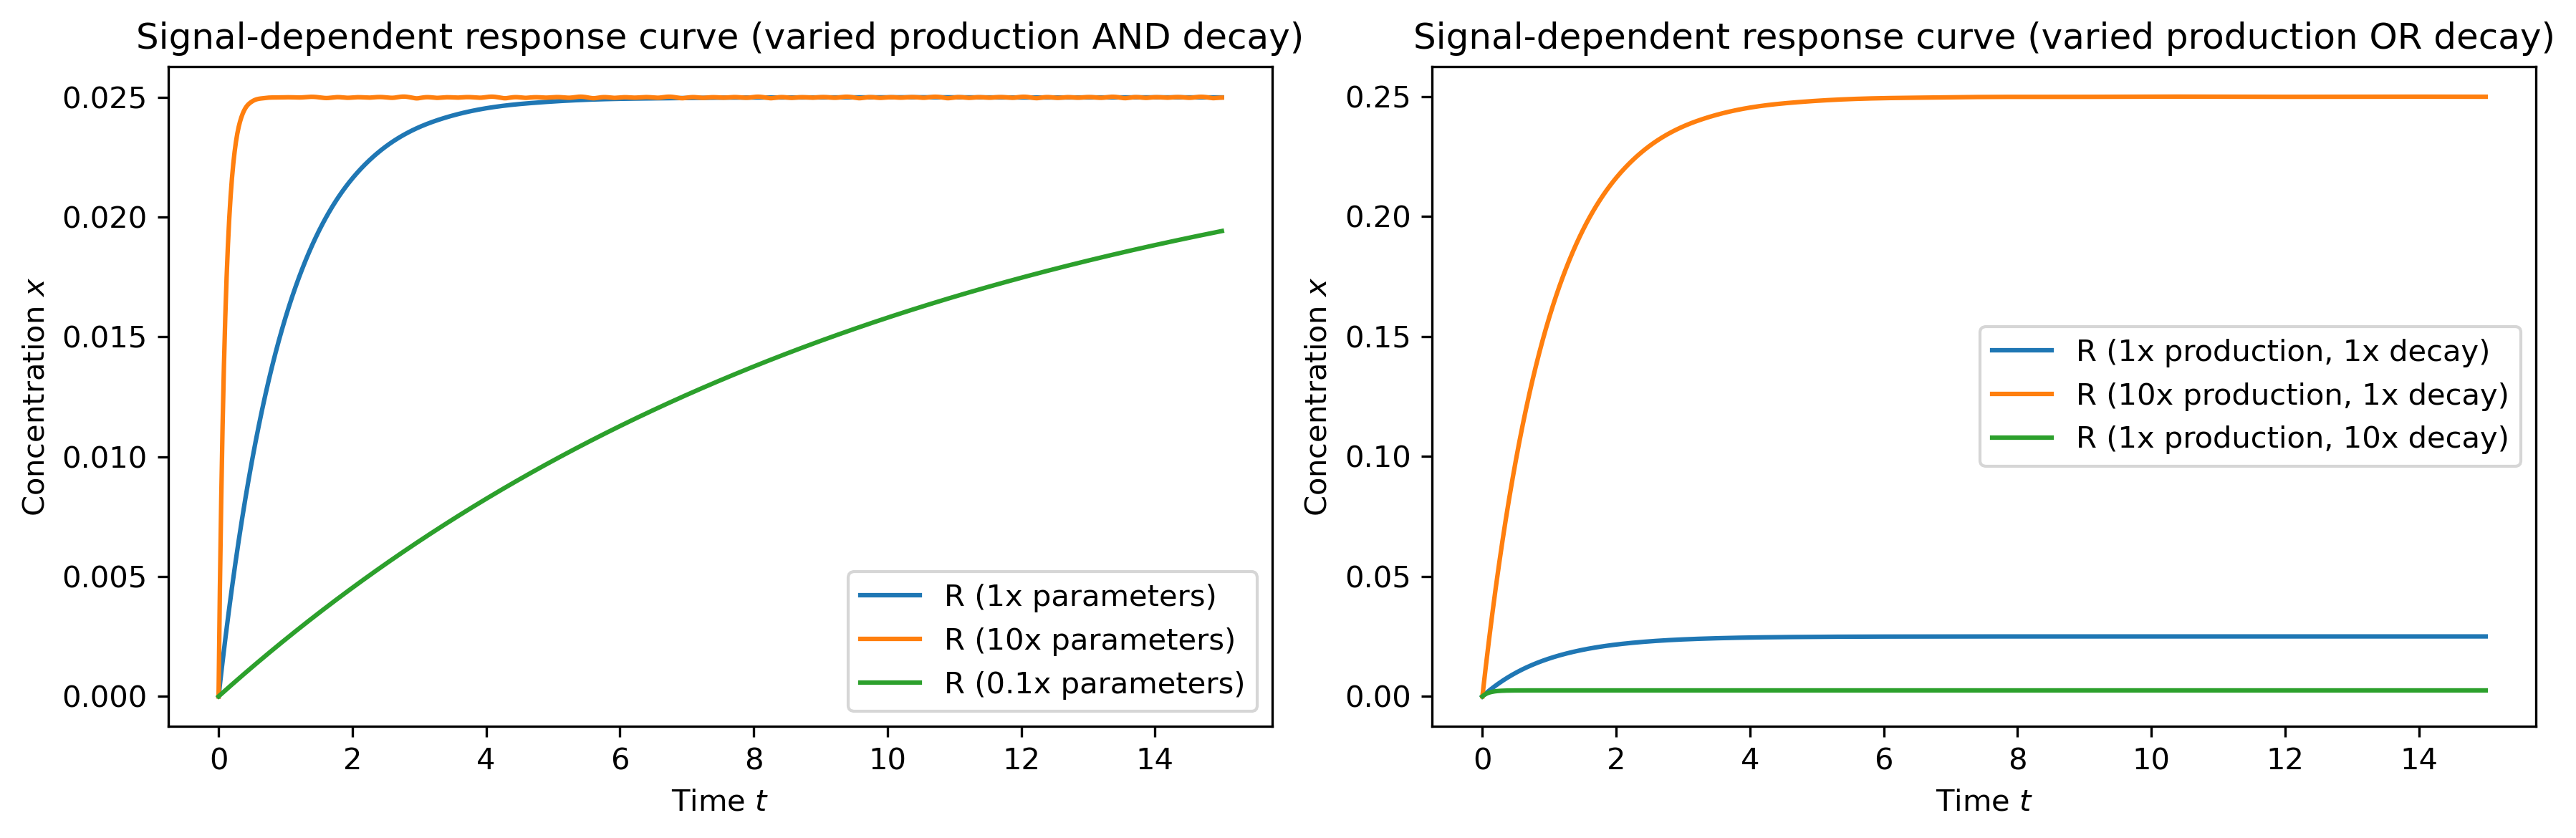

In [19]:
# PLOT THE FIGURE
fig.tight_layout()
fig

We assume $k_p = 0$. Setting $\alpha = 10$ or $\alpha = 0.1$, which is the factor by which both parameters are multiplied, does not affect the steady-state concentration but the time at which the steady state is reached proportional to $\frac{1}{\alpha}$.

Increasing only the production rate $k_1$ by $\alpha$ leads to an $\alpha$-times higher steady-state concentration, which through the equally increased production is reached in the same time as before. Similarly, only increasing the decay rate $k_2$ by $\alpha$ leads to an $\alpha$-times lower steady-state concentration which is reached $\alpha$-times faster (because the production rate stays the same).

Extending the above scheme (not shown here) with an enzyme $E$ affected by the response yields the following equations. It is assumed that the total amount of enzyme is conserved, meaning $E + E^* = E_T$:

<div style="display: flex; justify-content: space-around;">
<div style="width: 30%;">

$$
\text{Rate equation scheme}
$$

$$
\text{NOT PROVIDED}
$$

</div>
<div style="width: 60%;">

$$
\text{System of ODEs}
$$

$$
\begin{align*}
\text{I}. & \quad \dot{[R]} = k_p + k_0 [E^*] + k_1 [S] - k_2 [R] \\
\text{II}. & \quad \dot{[E^*]} = k_3 [R] \frac{[E_T] - [E^*]}{K_{M3} + [E_T] - [E^*]} - k_4 \frac{[E^*]}{K_{M4} + [E^*]}
\end{align*}
$$

</div>
</div>

The set of ODEs is implemented with initial conditions $R(0) = E^*(0) = 0$. Parameter values are $k_0 = 0.4$, $k_1 = 0.01$, $k_2 = 1$, $k_3 = 1$, $k_4 = 0.2$, $K_{M3} = 0.4$, $K_{M4} = 0.4$ and $E_T = 1$. The dynamics of $R$ and $E^*$ are plotted for $S = 2.5$.

In [ ]:
# FIGURE INITIALIZATION
fig = plt.figure(figsize=(12, 6), dpi=300)
gs = plt.GridSpec(2, 2)

# GENERAL PARAMETERS
t_span = [0, 200]  # time span
t_eval = np.linspace(*t_span, 2000)  # time points for plotting

In [ ]:
# INITIAL CONDITION
y0 = [0, 0]  # R, E*

k_0 = 0.4
k_1 = 0.01
k_2 = 1
k_3 = 1
k_4 = 0.2
K_M3 = 0.4
K_M4 = 0.4
E_T = 1  # total enzyme concentration
S = 2.5

p = [k_0, k_1, k_2, k_3, k_4, K_M3, K_M4, E_T, S]  # parameters

def ode(t, y, k_0, k_1, k_2, k_3, k_4, K_M3, K_M4, E_T, S):
    dydt = np.array([
        k_0 * y[1] + k_1 * S - k_2 * y[0],
        k_3 * y[0] * (E_T - y[1]) / (K_M3 + E_T - y[1]) - k_4 * (y[1]) / (K_M4 + y[1])
    ])
    return dydt

results = solve_ivp(ode, t_span, y0, t_eval=t_eval, args=p)

ax = fig.add_subplot(gs[:, 0])
ax.plot(results.t, np.column_stack(results.y), label=["$R_{num}$", "$E^*_{num}$"])

If the conversion of $E$ is fast (so that the reaction is in quasi-steady state), the fraction of active enzyme can be expressed by the Goldbeter-Koshland function:

$$
\frac{E^*}{E_T} = G(k_3 R, k_4, \frac{K_{M3}}{E_T}, \frac{K_{M4}}{E_T})
$$

We compare $\frac{E^*}{E_T}$ from the numerical simulation above with the Goldbeter-Koshland function. We also increase and decrease $k_3$ and $k_4$ by 100-fold.

In [22]:
def goldbeter_koshland(u_1, u_2, J_1, J_2):
    B = u_2 - u_1 + J_1 * u_2 + J_2 * u_1
    return (2 * u_1 * J_2) / (B + np.sqrt(B**2 - 4 * (u_2 - u_1) * u_1 * J_2))

# Compute Goldbeter-Koshland approximation for previous numerical solution:
gk = goldbeter_koshland(k_3*results.y[0], k_4, K_M3/E_T, K_M4/E_T)

# Add Goldbeter-Koshland solution to the main plot for comparison:
ax.plot(results.t, gk, linestyle="dashed", label="$E^*_{GK}$")
ax.set_title("Signal response with positive feedback loop")
ax.set_xlabel("Time $t$")
ax.set_ylabel("Concentration $x$")
ax.legend()

for i, scaling in enumerate([100, 0.01]):
    p = [k_0, k_1, k_2, scaling*k_3, scaling*k_4, K_M3, K_M4, E_T, S]  # scale parameters

    results = solve_ivp(ode, t_span, y0, t_eval=t_eval, args=p)
    gk = goldbeter_koshland(scaling*k_3*results.y[0], scaling*k_4, K_M3/E_T, K_M4/E_T)

    ax = fig.add_subplot(gs[i, 1])
    ax.plot(results.t, np.column_stack(results.y)[:, 1], color="tab:orange", label="$E^*_{num}$")
    ax.plot(results.t, gk, linestyle="dashed", color="tab:green", label="$E^*_{GK}$")
    ax.set_title(f"Goldbeter-Koshland approximation ({scaling}x $k_3$ and $k_4$)")
    ax.set_xlabel("Time $t$")
    ax.set_ylabel("Concentration $x$")
    ax.legend(loc="lower right")

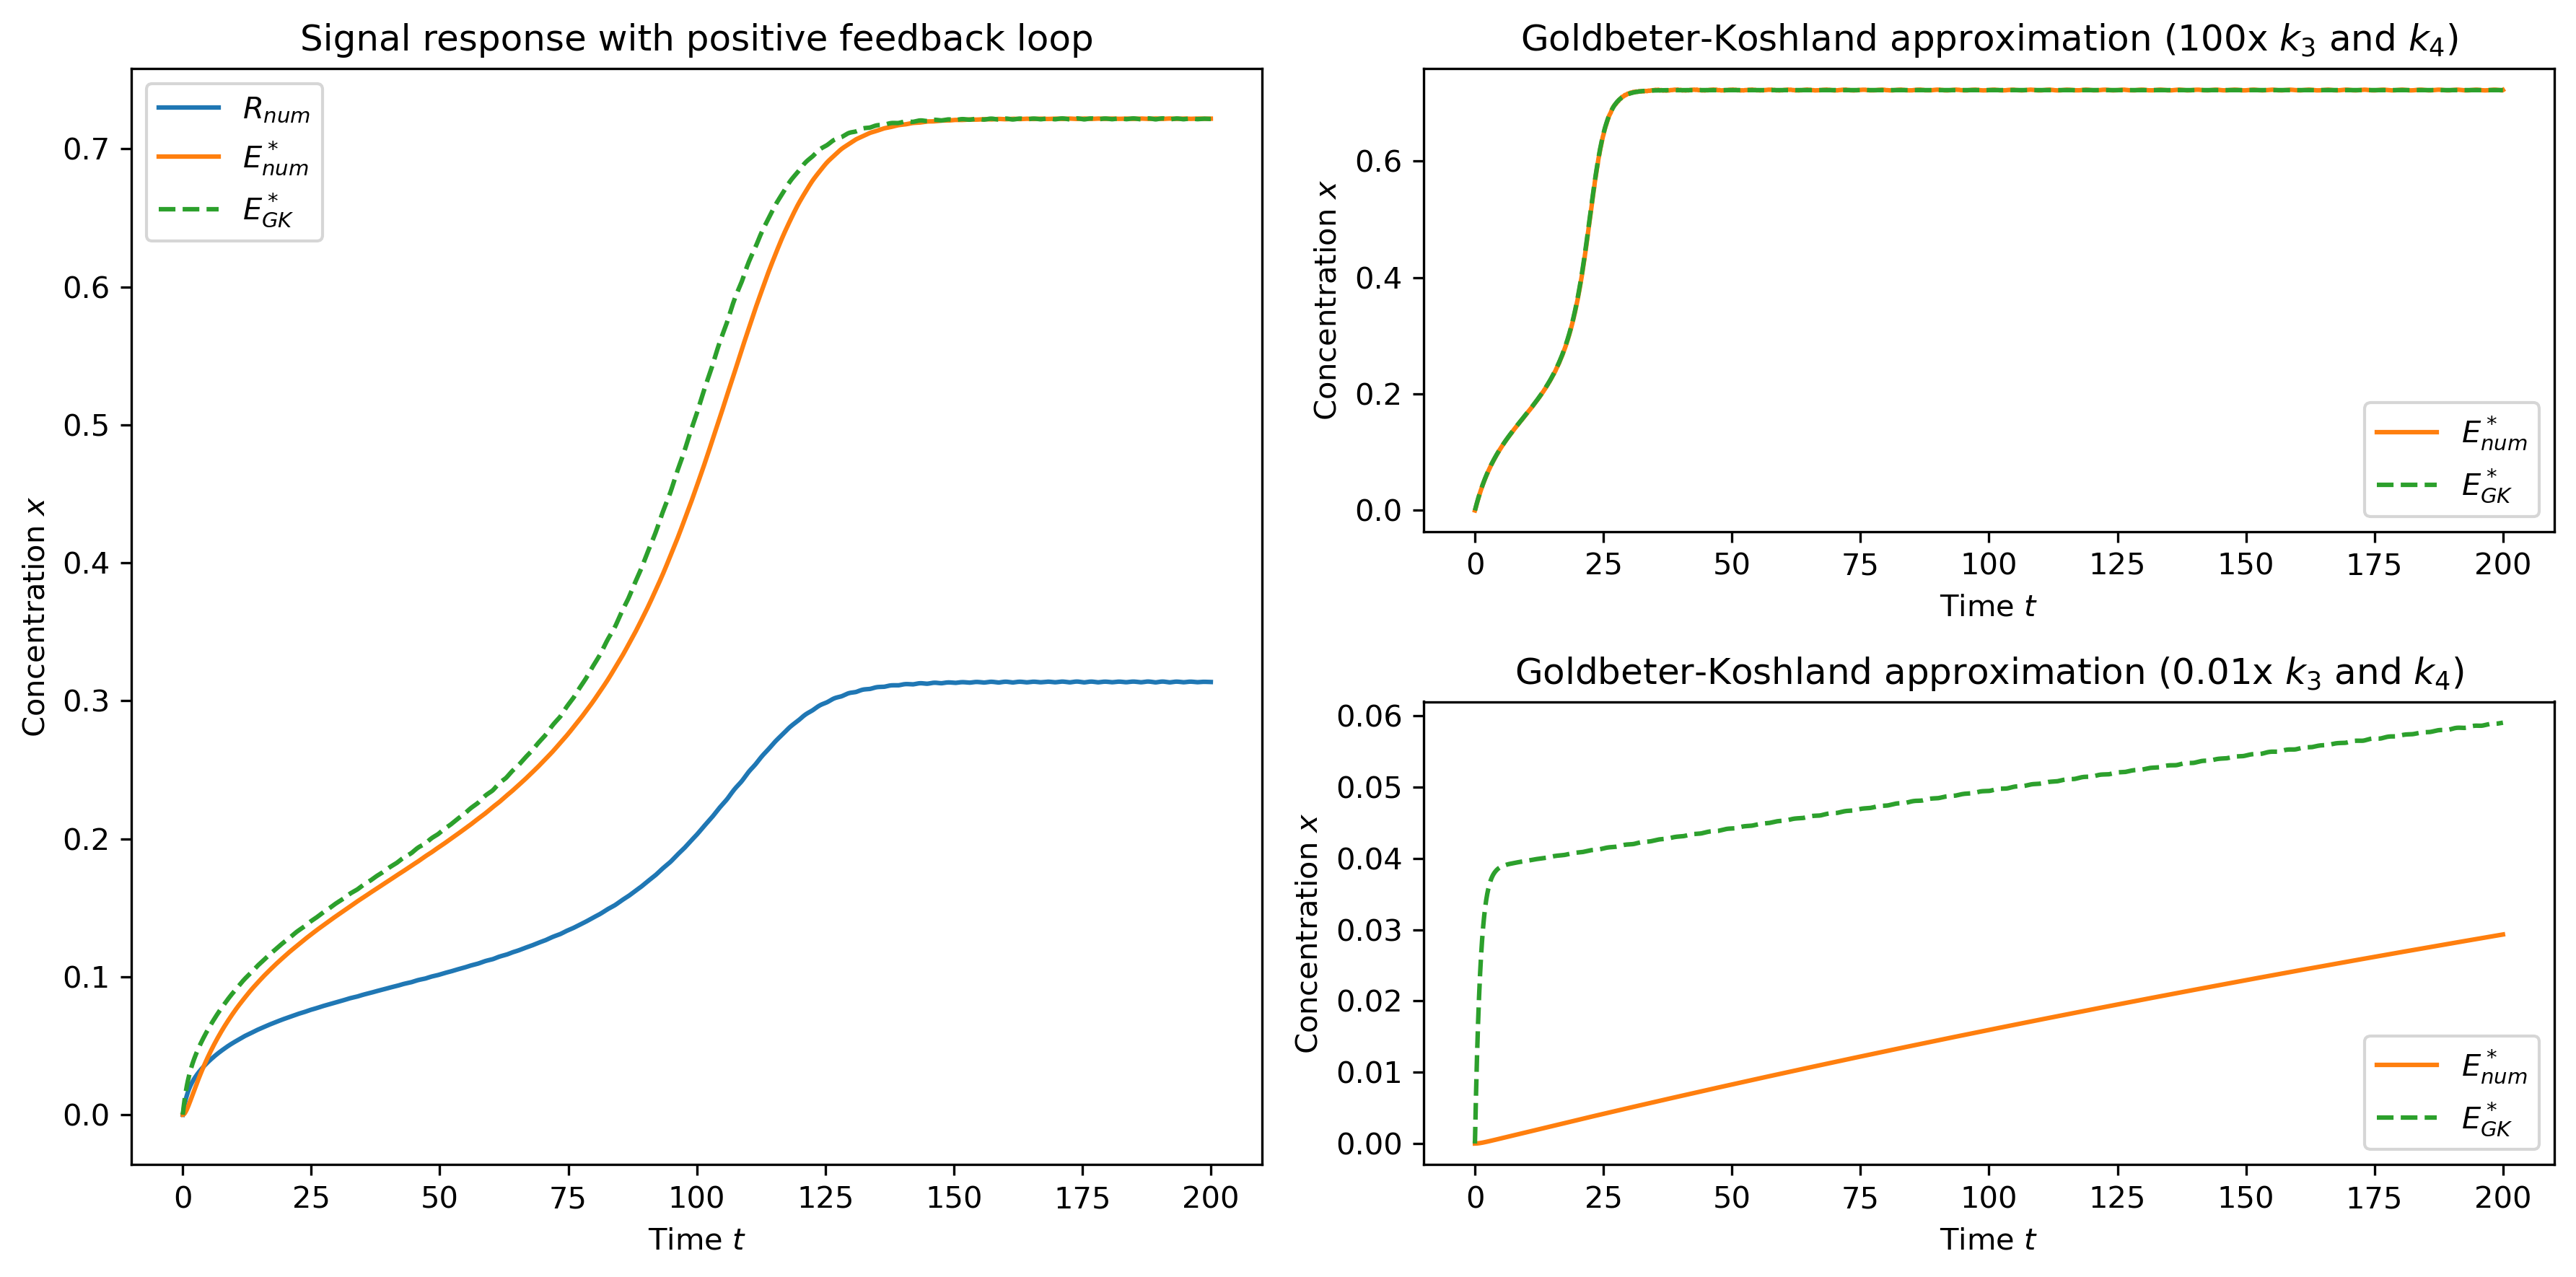

In [23]:
# PLOT THE FIGURE
fig.tight_layout()
fig

Taking the parameter values from above, the Goldbeter-Koshland solution follows the solution of the full system at least qualitatively, but with visible overestimation of $E^*$. This overestimation is dominant in parts where the active fraction is changing faster and, therefore, where the response $R$ changes fast.

Increasing $k_3$ and $k_4$ by a factor of $100$ leads to a faster conversion of $E$. This implies that for $[R]$ changing at similar rates as before, $[E^*]$ will remain much closer to its $R$-dependent equilibrium state. Thus, the Goldbeter-Koshland function which assumes a quasi-steady state for $E$ is very close to the full solution of the system.

Decreasing $k_3$ and $k_4$ by a factor of $0.01$ leads to the opposite result, namely to the Goldbeter-Koshland function being a poor approximation of the actual enzyme dynamics. This is because of the quasi-steady state assumption of the GK function, which cannot be made because the smaller values of $k_3$ and $k_4$ lead to the steady state being reached much more slowly.